In [94]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import warnings
import seaborn as sns
import scipy.stats as stats

pd.set_option('display.float_format', lambda x: '%.5f' % x)

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()

In [95]:
student.describe()

,math score,reading score,writing score
count,1000.00000,1000.00000,1000.00000
mean,66.08900,69.16900,68.05400
std,15.16308,14.60019,15.19566
min,0.00000,17.00000,10.00000
25%,57.00000,59.00000,57.75000
50%,66.00000,70.00000,69.00000
75%,77.00000,79.00000,79.00000
max,100.00000,100.00000,100.00000


In [96]:
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Question 1

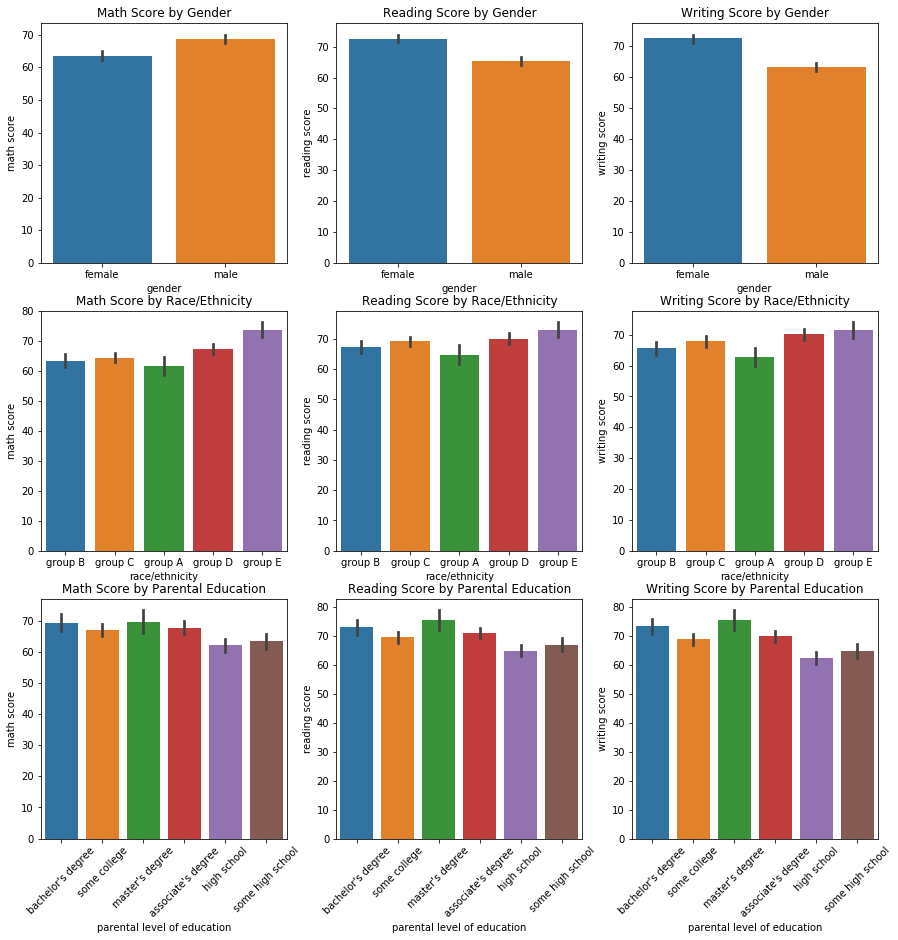

In [97]:
plt.figure(figsize=[15,15])
plt.subplot(3,3,1)
plt.title('Math Score by Gender')
sns.barplot(student['gender'],student['math score'])
plt.subplot(3,3,2)
plt.title('Reading Score by Gender')
sns.barplot(student['gender'],student['reading score'])
plt.subplot(3,3,3)
plt.title('Writing Score by Gender')
sns.barplot(student['gender'],student['writing score'])

plt.subplot(3,3,4)
plt.title('Math Score by Race/Ethnicity')
sns.barplot(student['race/ethnicity'],student['math score'])
plt.subplot(3,3,5)
plt.title('Reading Score by Race/Ethnicity')
sns.barplot(student['race/ethnicity'],student['reading score'])
plt.subplot(3,3,6)
plt.title('Writing Score by Race/Ethnicity')
sns.barplot(student['race/ethnicity'],student['writing score'])

plt.subplot(3,3,7)
plt.title('Math Score by Parental Education')
sns.barplot(student['parental level of education'],student['math score'])
plt.xticks(rotation=45)
plt.subplot(3,3,8)
plt.title('Reading Score by Parental Education')
sns.barplot(student['parental level of education'],student['reading score'])
plt.xticks(rotation=45)
plt.subplot(3,3,9)
plt.title('Writing Score by Parental Education')
sns.barplot(student['parental level of education'],student['writing score'])
plt.xticks(rotation=45)

plt.show()

In [98]:
groupings = ['gender', 'race/ethnicity', 'parental level of education']
plist = []
for grouping in groupings:
    for var in ['math score', 'reading score', 'writing score']:
        print('\n\n\n{} by {}'.format(var.title(), grouping.title()))
        groups = student[grouping].unique()
        l = len(groups)
        for i in range(0,l):
            for j in range(i+1,l):
                print('T-test between {} and {}:'.format(groups[i], groups[j]))
                test = stats.ttest_ind(
                    student[var][student[grouping] == groups[i]],
                    student[var][student[grouping] == groups[j]]
                )
                print(test)
                plist.append(test.pvalue)

print('\n\nPercentage of tests with p-value above 0.1: ', str(round(sum([p <= .1 for p in plist]),3)*100/len(plist)))
print('Percentage of tests with p-value above 0.05: ', str(round(sum([p <= .05 for p in plist]),3)*100/len(plist)))
print('Percentage of tests with p-value above 0.01: ', str(round(sum([p <= .01 for p in plist]),3)*100/len(plist)))




Math Score by Gender
T-test between female and male:
Ttest_indResult(statistic=-5.383245869828983, pvalue=9.120185549328822e-08)



Reading Score by Gender
T-test between female and male:
Ttest_indResult(statistic=7.959308005187657, pvalue=4.680538743933289e-15)



Writing Score by Gender
T-test between female and male:
Ttest_indResult(statistic=9.979557910004507, pvalue=2.019877706867934e-22)



Math Score by Race/Ethnicity
T-test between group B and group C:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
T-test between group B and group A:
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
T-test between group B and group D:
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.004886197137104194)
T-test between group B and group E:
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.007946047497971e-09)
T-test between group C and group A:
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588042)
T-test between gr

Two-thirds of group comparisons have statistically significant differences

# Question 2

In [99]:
student['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [100]:
for var in ['math score', 'reading score', 'writing score']:
    print(var.title() + ':')
    print(stats.ttest_ind(
    student[var][student['lunch']=='standard'],
    student[var][student['lunch']=='free/reduced']
    ))
    print('\n')

Math Score:
Ttest_indResult(statistic=11.837180472914612, pvalue=2.4131955993137074e-30)


Reading Score:
Ttest_indResult(statistic=7.451056467473455, pvalue=2.0027966545279011e-13)


Writing Score:
Ttest_indResult(statistic=8.009784197834758, pvalue=3.186189583166477e-15)




Yes, there are stastically significant differences across lunch level for all 3 tests. This makes sense, as lunch status should be correlated with poverty and a parent's education level. It is not randomly assigned in most cases.

# Question 3

In [101]:
for var in ['math score', 'reading score', 'writing score']:
    print(var.title() + ':')
    print(stats.ttest_ind(
    student[var][student['test preparation course']=='completed'],
    student[var][student['test preparation course']=='none']
    ))
    print('\n')

Math Score:
Ttest_indResult(statistic=5.704616417349102, pvalue=1.5359134607147415e-08)


Reading Score:
Ttest_indResult(statistic=7.871663538941468, pvalue=9.081783336892205e-15)


Writing Score:
Ttest_indResult(statistic=10.409173436808748, pvalue=3.68529173524572e-24)




Yes, there are statistically significant (and positive) differences between students who completed and did not complete the test preparation course. However, to determine a causal effect, we have to consider how selection into the course is determined. If it is merely the smart and motivated students who sign up, we may just be observing selection effects

In [102]:
for level in student['parental level of education'].unique():
    print(level)
    new_df = student[student['parental level of education']==level]
    completed = [x=='completed' for x in new_df['test preparation course']]
    print(sum(completed)/len(new_df))
    print('\n')

bachelor's degree
0.3898305084745763


some college
0.3407079646017699


master's degree
0.3389830508474576


associate's degree
0.36936936936936937


high school
0.2857142857142857


some high school
0.4301675977653631




We would have to commit to further analysis to see what is driving the differences.

# Question 4

In [103]:
scores = student.iloc[:,5:8]

scores.corr()

,math score,reading score,writing score
math score,1.00000,0.81758,0.80264
reading score,0.81758,1.00000,0.95460
writing score,0.80264,0.95460,1.00000


Reading and writing are most correlated.